In [1]:
import numpy as np
import anndata
import pandas as pd
import scanpy as sc
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import os
# Only small maps so cpu works fine too
os.environ["JAX_PLATFORM_NAME"] = "cpu"
#from moscot.problems.time._lineage import TemporalProblem
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.settings.verbosity = 0

In [2]:
sns.set_style('whitegrid')

sc.set_figure_params(dpi=200)

In [3]:
palette=sns.color_palette()

In [4]:
Path="/home/mgander/mouse_atlas/data/WOT"

In [5]:
# I loaded the WOT data using CellRank

#import cellrank as cr

#adata = cr.datasets.reprogramming_schiebinger(subset_to_serum=True)
#adata.write(f"{Path}/reprogramming_schiebinger_serum.h5ad")

In [6]:
adata=sc.read(f"{Path}/reprogramming_schiebinger_serum.h5ad")

In [8]:
adata.obsm['X_force_directed_']=adata.obsm['X_force_directed']

In [9]:
adata.obs['day']=adata.obs['day'].astype('float')

In [10]:
adata.obs['day_cat']=adata.obs['day'].astype('category')
flare=sns.color_palette("flare", as_cmap=True)
n=len(set(adata.obs['day']))
cat_colorset=[]
for i in range(n):
    cat_colorset.append(flare(int(i/n*255)))

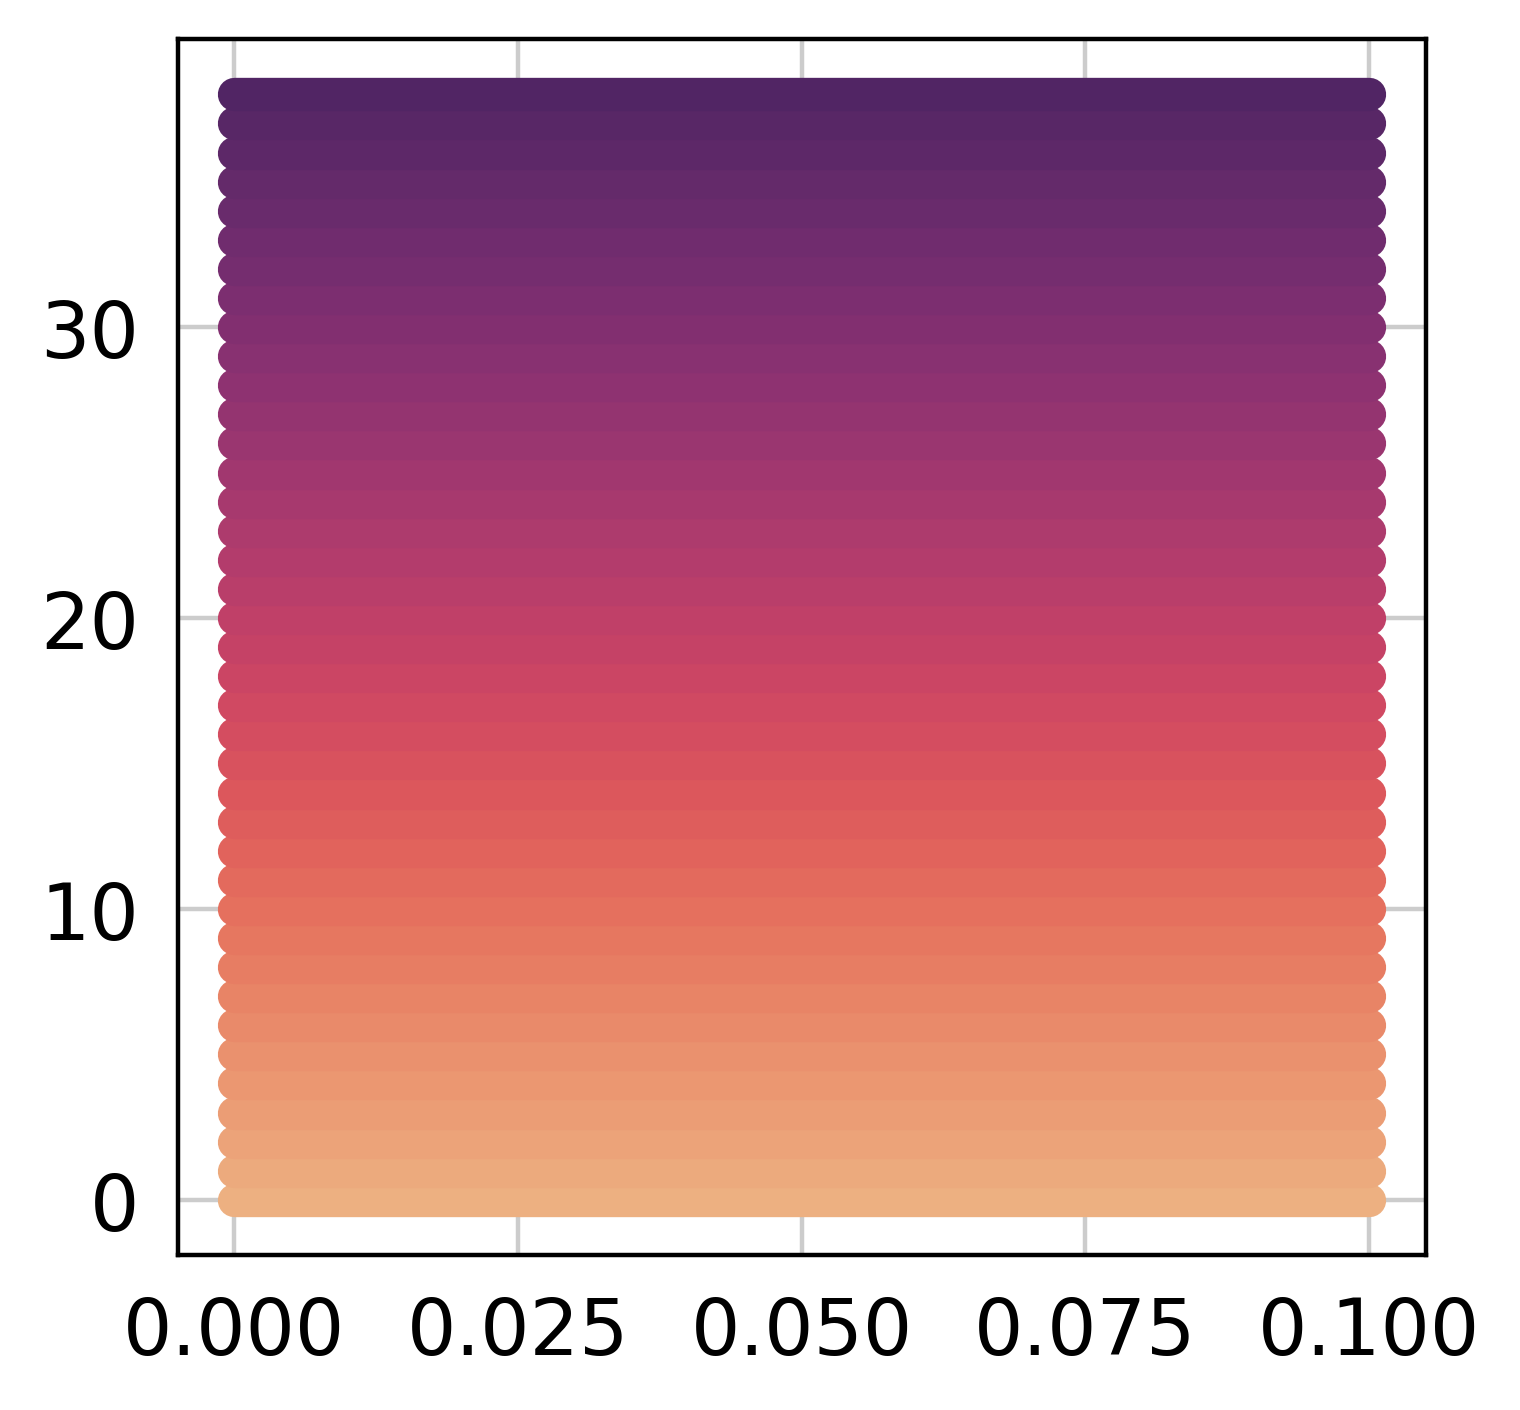

In [12]:
for i in range(n):
    plt.plot([0,0.1], [i,i], color=cat_colorset[i], linewidth=6)

/home/mgander/jax_test/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


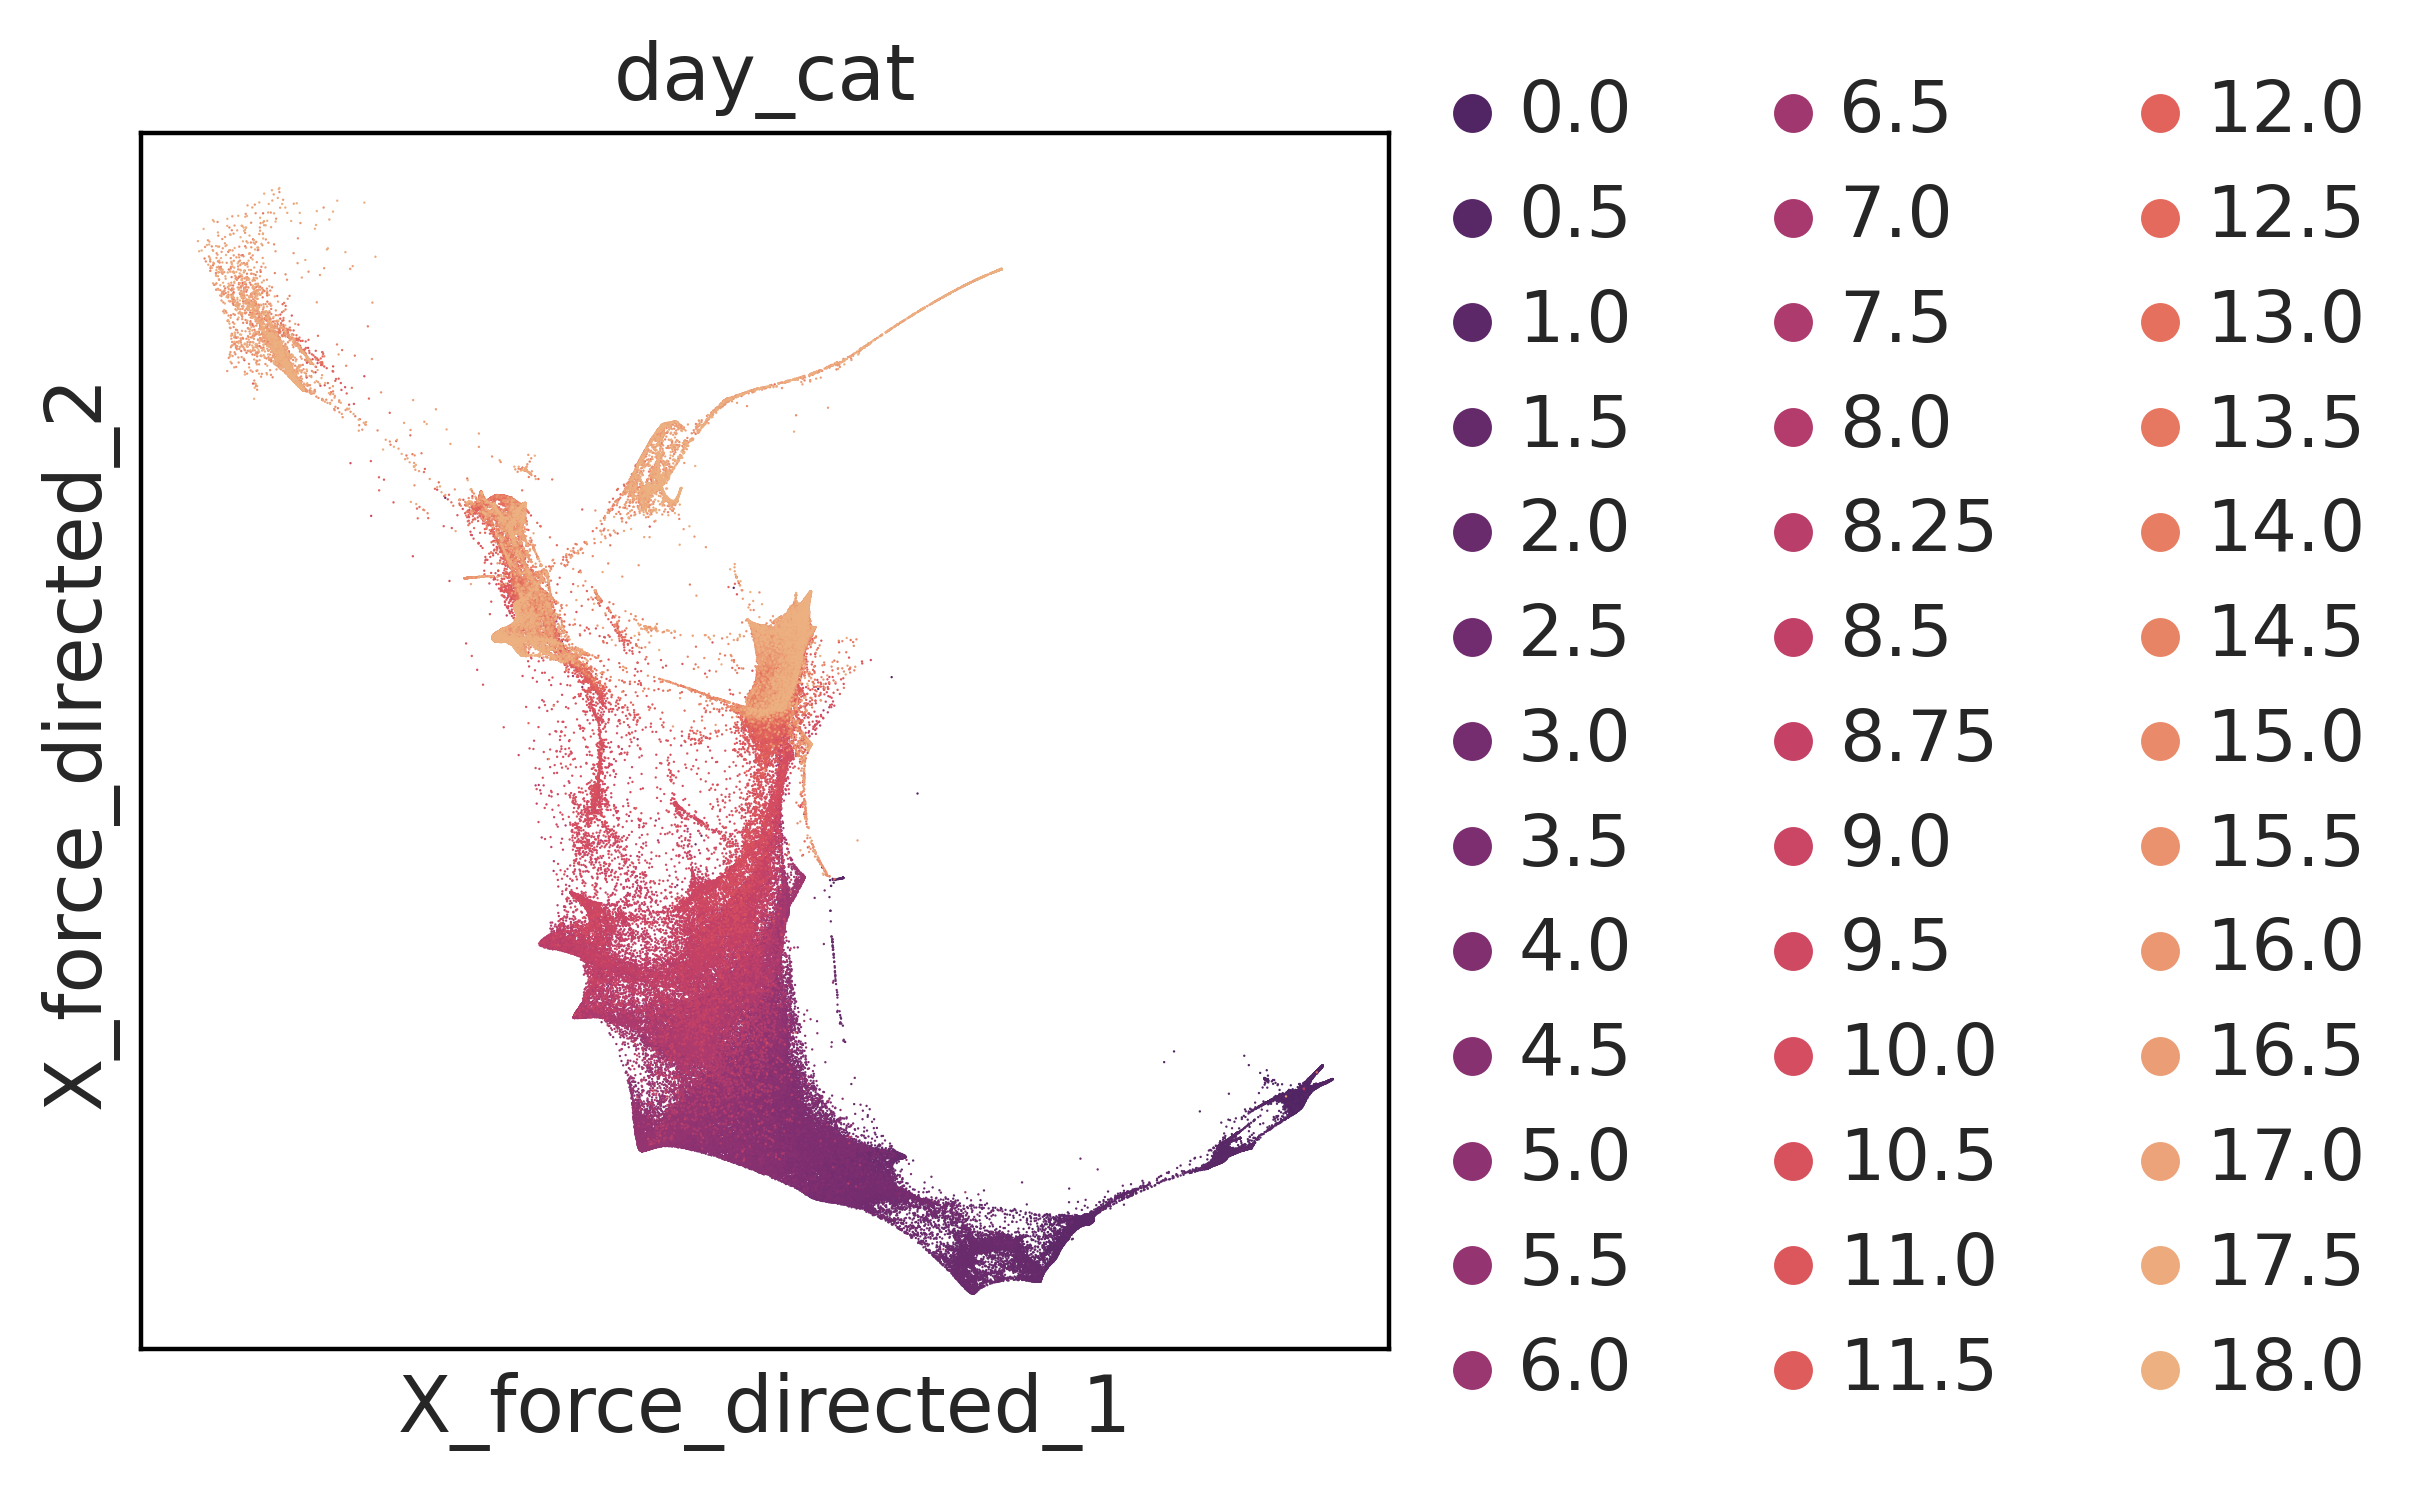

In [17]:
sc.pl.embedding(adata, basis='X_force_directed_', color='day_cat', palette=list(reversed(cat_colorset)))

/home/mgander/jax_test/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


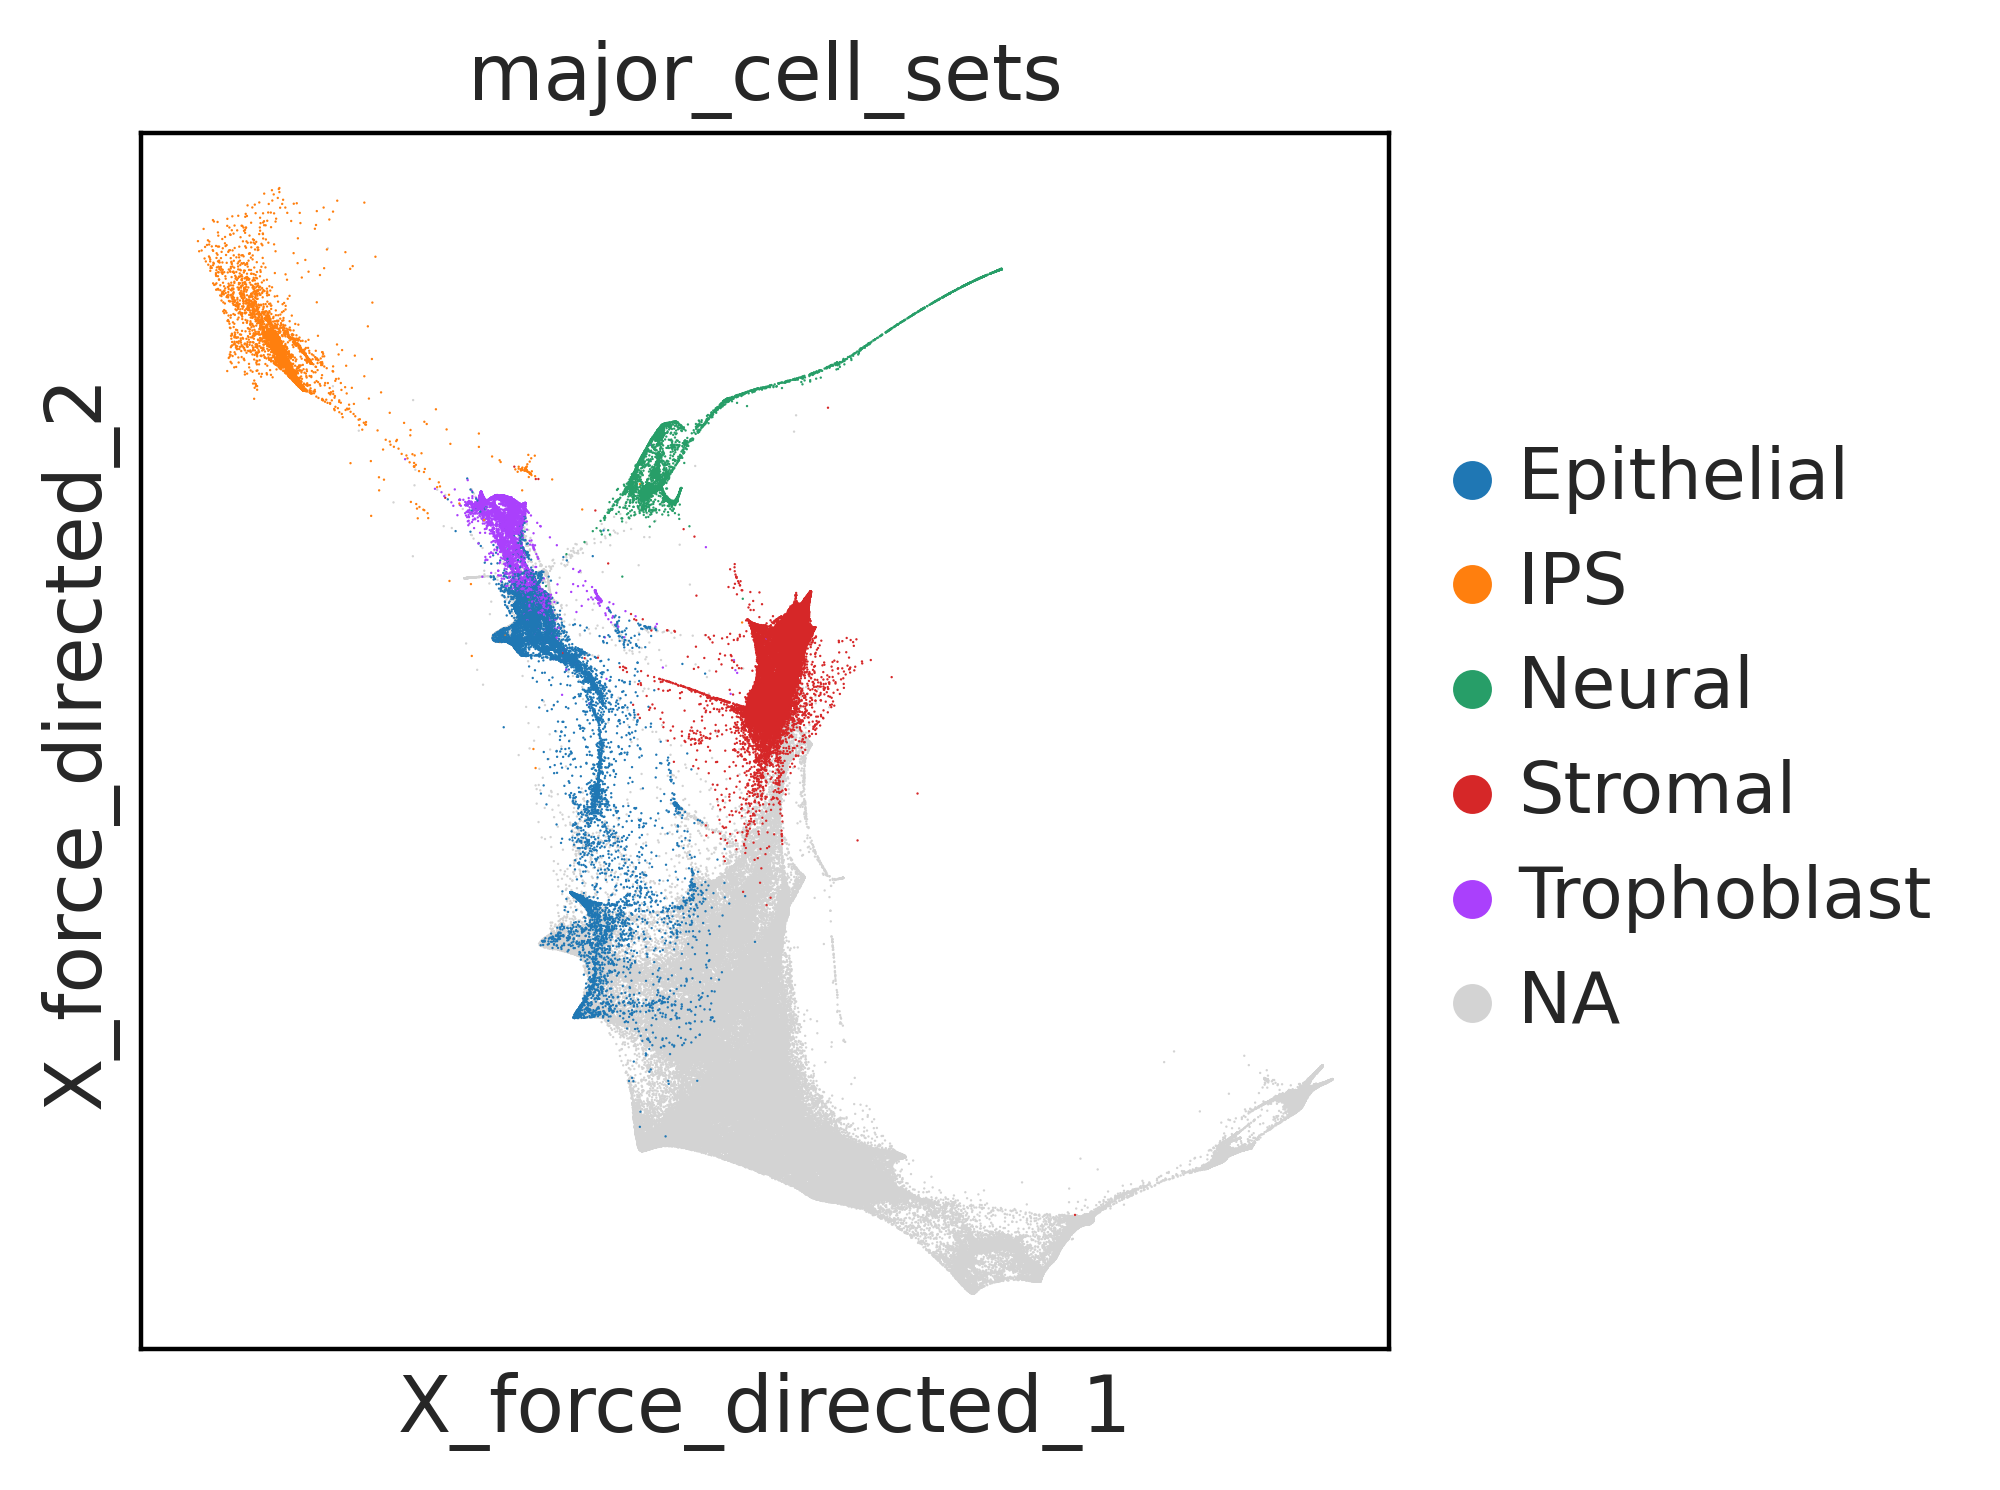

In [12]:
sc.pl.embedding(adata, basis='X_force_directed_', color='major_cell_sets', palette=palette)

In [72]:
adata=adata[adata.obs['day']>7.9].copy()
adata.obs['day']=adata.obs['day'].astype('category')

In [73]:
days=sorted(set(adata.obs['day']))
# Every 0.5 days for 18 days 

In [74]:
pd.DataFrame(days).astype('str').to_csv(f'{Path}/Representations/obs/days.csv')

In [75]:
days

[8.0,
 8.25,
 8.5,
 8.75,
 9.0,
 9.5,
 10.0,
 10.5,
 11.0,
 11.5,
 12.0,
 12.5,
 13.0,
 13.5,
 14.0,
 14.5,
 15.0,
 15.5,
 16.0,
 16.5,
 17.0,
 17.5,
 18.0]

In [51]:
for i in range(len(days)-1):
#for i in range(1):

    print(i)
    day0=days[i]
    day1=days[i+1]
    adata_sub=adata[adata.obs['day'].isin([day0, day1])].copy()
    
    
    sc.pp.pca(adata_sub, use_highly_variable=True)
    sc.pp.neighbors(adata_sub)
    sc.tl.umap(adata_sub, n_components=3)

    df_PCA=pd.DataFrame(data=adata_sub.obsm['X_pca'], index=adata_sub.obs.index)
    df_PCA.to_csv(f'{Path}/Representations/pca/{day0}_{day1}.csv')
    df_UMAP=pd.DataFrame(data=adata_sub.obsm['X_umap'], index=adata_sub.obs.index)
    df_UMAP.to_csv(f'{Path}/Representations/umap/{day0}_{day1}.csv')
    
    adata_sub.write(f"{Path}/anndatas/{day0}_{day1}_adata.h5ad")
    
    X=adata_sub.X
    obs=adata_sub.obs
    
    #obs.to_csv(f'{Path}/Representations/{day0}_{day1}_umap.csv')
    
    obs['cell_state']=[str(a) for a in obs['major_cell_sets']]
    
    
    obs0=obs[obs['day']==day0].copy()
    obs1=obs[obs['day']==day1].copy()
    
    obs0.to_csv(f'{Path}/Representations/obs/{day0}.csv')
    obs1.to_csv(f'{Path}/Representations/obs/{day1}.csv')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
